In [1]:
import pandas as pd
import numpy as np
import json
from itertools import chain

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

import time

import glob


params = {
   'axes.labelsize': 14,
   'font.size': 14,
   'legend.fontsize': 14,
   'xtick.labelsize': 14,
   'ytick.labelsize': 14,
   'text.usetex': False,
   'figure.figsize': [4.5, 4.5],
    'savefig.facecolor':'white'
   }

mpl.rcParams.update(params)


timestr = time.strftime("%Y%m%d%H%M")

In [2]:
sol_saveat_dt = [1,1e-4][0]

print(sol_saveat_dt)

inpath = "output/"
outpath = "figures/supp2a/" 

1


In [3]:
##############################################
# set to True to save fig

savefigures = True #False #True 

##############################################

In [4]:
! ls -lh output | grep "_u\." | grep "sim_" | wc -l

190


In [5]:
print(len(glob.glob(inpath+"*_u.csv"))) 

190


In [6]:
input_file_ids = [i.rstrip("_u.csv") for i in glob.glob(inpath+"*_u.csv")]


In [7]:
input_file_ids = sorted(input_file_ids)

In [8]:
input_dfs = []

for fid in input_file_ids:

    dfn = fid + "_u.csv"
    tfn = fid + "_t.csv"
    nfn = fid + "_unames.csv"
    
    df = pd.read_csv(dfn,header=None)
    tf = pd.read_csv(tfn,header=None)
    nf = pd.read_csv(nfn,header=None)
    
    df.columns = [i[:-1] for i in nf[0].values.tolist() ]
    
    df['time_s'] = tf[0].copy()
    df['condition'] = fid.replace("output/sim_","").split("_extraTag",1)[0] 
    
    input_dfs.append(df)
    
input_df = pd.concat(input_dfs, axis=0, ignore_index=True)

In [9]:
print(input_df.shape)

(58900, 185)


In [10]:
input_df = input_df.reindex(sorted(input_df.columns), axis=1)

In [11]:
input_df.head(3)

,ADP_a,ADP_i_a,ADP_i_n,ADP_mi_a,ADP_mi_n,ADP_mx_a,ADP_mx_n,ADP_n,ADPmito_a,ADPmito_n,...,f26bp_a,h,hIP3Ca_a,mGluRboundRatio_a,n,nBK_a,pgate,sTRP_a,time_s,vV
0,0.045,0.044347,0.057207,0.043629,0.056055,1.144319,1.129008,0.047784,1.744560,1.851257,...,0.012170,0.981124,0.653157,0.0,0.034674,0.000007,0.035539,0.001247,1.0,0.0237
1,0.045,0.044306,0.057167,0.043589,0.056016,1.144333,1.128973,0.047784,1.744587,1.851184,...,0.012171,0.990555,0.653153,0.0,0.023402,0.000007,0.025259,0.001247,2.0,0.0237
2,0.045,0.044290,0.057161,0.043573,0.056010,1.144311,1.128928,0.047784,1.744545,1.851093,...,0.012172,0.990651,0.653133,0.0,0.023267,0.000007,0.025131,0.001247,3.0,0.0237


In [12]:
all_cnds_l = input_df['condition'].unique()

group1_control = [i for i in all_cnds_l if i.startswith('121_def') ]

print(len(group1_control))


group2_GLUT1 = [i for i in all_cnds_l if i.startswith('g1_61') and ("_dose" not in i) ]

print(len(group2_GLUT1))


1
1


In [13]:
selected_cnds_all = group1_control + group2_GLUT1

In [14]:
NADtot_c = 0.212 # mM # cyto
NADPtot = 0.0303 # mM
NADtot_m = 0.726 # mM

ATDPtot_n = 1.4449961078157665
ATDPtot_a = 1.3434724532826217
qAK = 0.92


In [15]:
selected_cnds_all

['121_default', 'g1_61_def']

In [17]:
lut_ratios = {
    
 '121_default': "#069e1d",
 'g1_61_def': "#fa6f0c"
}

In [21]:
ratios2plot_names = [ "NADc/NADHc n", "NADc/NADHc a", "NADm/NADHm n","NADm/NADHm a", "NADPc/NADPHc n","NADPc/NADPHc a", 
                     "ATPc/ADPc n","ATPc/ADPc a", "ATPm/ADPm n","ATPm/ADPm a", "ATPi/ADPi n","ATPi/ADPi a"]
    

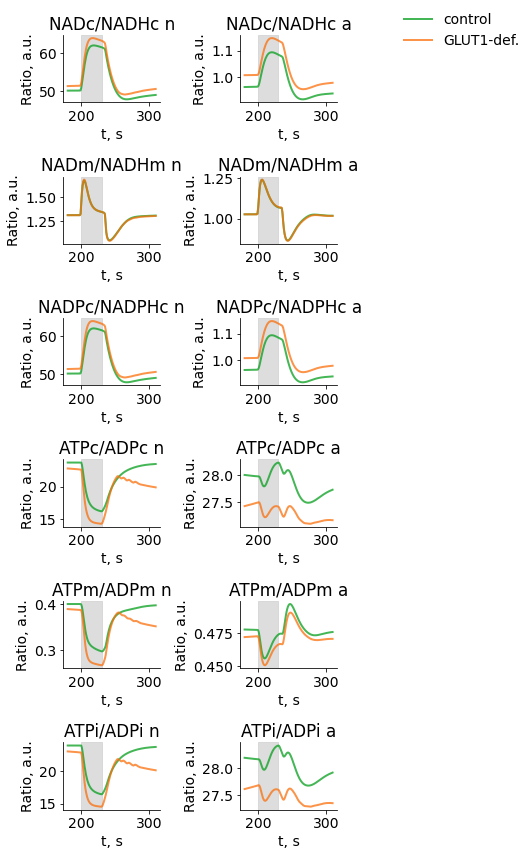

In [22]:
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(5,12)) 


for i,selected_cnds in enumerate(selected_cnds_all):
    
    NADcNADHc_n = (NADtot_c - input_df.loc[(input_df['time_s']>=180) & (input_df['condition']==selected_cnds) ,"NADH_n"].values)/input_df.loc[(input_df['time_s']>=180) & (input_df['condition']==selected_cnds) ,"NADH_n"].values
    NADcNADHc_a = (NADtot_c - input_df.loc[(input_df['time_s']>=180) & (input_df['condition']==selected_cnds) ,"NADH_a"].values)/input_df.loc[(input_df['time_s']>=180) & (input_df['condition']==selected_cnds) ,"NADH_a"].values

    NADmNADHm_n = (NADtot_m - input_df.loc[(input_df['time_s']>=180) & (input_df['condition']==selected_cnds) ,"NADHmito_n"].values)/input_df.loc[(input_df['time_s']>=180) & (input_df['condition']==selected_cnds) ,"NADHmito_n"].values
    NADmNADHm_a = (NADtot_m - input_df.loc[(input_df['time_s']>=180) & (input_df['condition']==selected_cnds) ,"NADHmito_a"].values)/input_df.loc[(input_df['time_s']>=180) & (input_df['condition']==selected_cnds) ,"NADHmito_a"].values

    NADPcNADPHc_n = (NADtot_c - input_df.loc[(input_df['time_s']>=180) & (input_df['condition']==selected_cnds) ,"NADH_n"].values)/input_df.loc[(input_df['time_s']>=180) & (input_df['condition']==selected_cnds) ,"NADH_n"].values
    NADPcNADPHc_a = (NADtot_c - input_df.loc[(input_df['time_s']>=180) & (input_df['condition']==selected_cnds) ,"NADH_a"].values)/input_df.loc[(input_df['time_s']>=180) & (input_df['condition']==selected_cnds) ,"NADH_a"].values

    ADP_n = (input_df.loc[(input_df['time_s']>=180) & (input_df['condition']==selected_cnds) ,"ATP_n"].values)/2*(-qAK+np.sqrt(qAK*qAK+4*qAK*(ATDPtot_n/(input_df.loc[(input_df['time_s']>=180) & (input_df['condition']==selected_cnds) ,"ATP_n"].values)-1)))
    ADP_a = (input_df.loc[(input_df['time_s']>=180) & (input_df['condition']==selected_cnds) ,"ATP_a"].values)/2*(-qAK+np.sqrt(qAK*qAK+4*qAK*(ATDPtot_a/(input_df.loc[(input_df['time_s']>=180) & (input_df['condition']==selected_cnds) ,"ATP_a"].values)-1)))

    ATPADPc_n = input_df.loc[(input_df['time_s']>=180) & (input_df['condition']==selected_cnds) ,"ATP_n"].values / ADP_n
    ATPADPc_a = input_df.loc[(input_df['time_s']>=180) & (input_df['condition']==selected_cnds) ,"ATP_a"].values / ADP_a

    ATPADPm_n = input_df.loc[(input_df['time_s']>=180) & (input_df['condition']==selected_cnds) ,"ATPmito_n"].values / input_df.loc[(input_df['time_s']>=180) & (input_df['condition']==selected_cnds) ,"ADPmito_n"].values 
    ATPADPm_a = input_df.loc[(input_df['time_s']>=180) & (input_df['condition']==selected_cnds) ,"ATPmito_a"].values / input_df.loc[(input_df['time_s']>=180) & (input_df['condition']==selected_cnds) ,"ADPmito_a"].values 
    
    ATPADPi_n = input_df.loc[(input_df['time_s']>=180) & (input_df['condition']==selected_cnds) ,"ATP_i_n"].values / input_df.loc[(input_df['time_s']>=180) & (input_df['condition']==selected_cnds) ,"ADP_i_n"].values 
    ATPADPi_a = input_df.loc[(input_df['time_s']>=180) & (input_df['condition']==selected_cnds) ,"ATP_i_a"].values / input_df.loc[(input_df['time_s']>=180) & (input_df['condition']==selected_cnds) ,"ADP_i_a"].values 
    

    ratios2plot = [ NADcNADHc_n, NADcNADHc_a, NADmNADHm_n,NADmNADHm_a, NADPcNADPHc_n,NADPcNADPHc_a, ATPADPc_n,ATPADPc_a, ATPADPm_n,ATPADPm_a, ATPADPi_n,ATPADPi_a ]
    
    j = 0
    
    for met, ax in zip(ratios2plot, axs.ravel()):

        
        ax.axvspan(200, 230, color='lightgrey', alpha=0.5)

        g = sns.lineplot(x=np.arange(180,int(1+input_df['time_s'].max())), y=met, lw=2,alpha=0.75, ax=ax,
                        color=lut_ratios[selected_cnds],label=selected_cnds_all[i] ) 
        
        # if you don't like lines having different style, remove from this line the following: ,style="condition"

        ax.legend([],[], frameon=False)

        
        
        ax.set_xlabel("t, s")
        ax.set_ylabel("Ratio, a.u.")

        ax.set_title(ratios2plot_names[j] ) # + " " + selected_cnds
        
        j = j + 1
        
        ax.spines.top.set_visible(False)
        ax.spines.right.set_visible(False)

        
        
plt.subplots_adjust(hspace=1)        
plt.subplots_adjust(wspace=0.35)        


handles, labels = ax.get_legend_handles_labels()

labels2names = {'121_default':'control', 'g1_61_def':'GLUT1-def.'}

fig.legend(handles, [labels2names[i] for i in labels],bbox_to_anchor=(1.5, 1.0),frameon=False)  

fig.tight_layout()
plt.show()    


In [23]:
if savefigures == True:
    
    spec_id = "ratios_"
    
    fig.savefig(outpath +  spec_id +  timestr + ".pdf",transparent=False, bbox_inches="tight")
    fig.savefig(outpath +  spec_id +  timestr + ".png",dpi=300,transparent=False, bbox_inches="tight")
